In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [23]:
resident_foreigners_norm = pd.read_table("Data_norm/resident_foreigners_norm.csv", sep = ",", 
                                         usecols = ['Provincia', 'Cittadinanza','Periodo', 'Sesso', 'Numero'])
resident_foreigners_norm.head()

,Provincia,Cittadinanza,Periodo,Sesso,Numero
0,Alessandria,Andorra,2017,maschi,0
1,Alessandria,Andorra,2017,femmine,1
2,Genova,Andorra,2013,maschi,0
3,Genova,Andorra,2013,femmine,1
4,Como,Andorra,2013,maschi,0


In [25]:
provincia_regione = pd.read_table("Data/regioni.csv", sep = "\t")
provincia_regione.head()

,Provincia,Regione
0,Torino,Piemonte
1,Vercelli,Piemonte
2,Novara,Piemonte
3,Cuneo,Piemonte
4,Asti,Piemonte


In [26]:
regione_zona = pd.read_table("Data/territori.csv", sep = "\t")
regione_zona.head()

,Regione,Zona
0,Abruzzo,Sud
1,Basilicata,Sud
2,Calabria,Sud
3,Campania,Sud
4,Emilia-Romagna,Nord-est


In [27]:
years = sorted(list(set(resident_foreigners_norm["Periodo"])))
maschi = [sum(resident_foreigners_norm[(resident_foreigners_norm["Sesso"] == "maschi") 
                                       & (resident_foreigners_norm["Periodo"] == y)]["Numero"]) for y in years]
femmine = [sum(resident_foreigners_norm[(resident_foreigners_norm["Sesso"] == "femmine") 
                                       & (resident_foreigners_norm["Periodo"] == y)]["Numero"]) for y in years]
totale = [i+j for i, j in zip(maschi, femmine)]

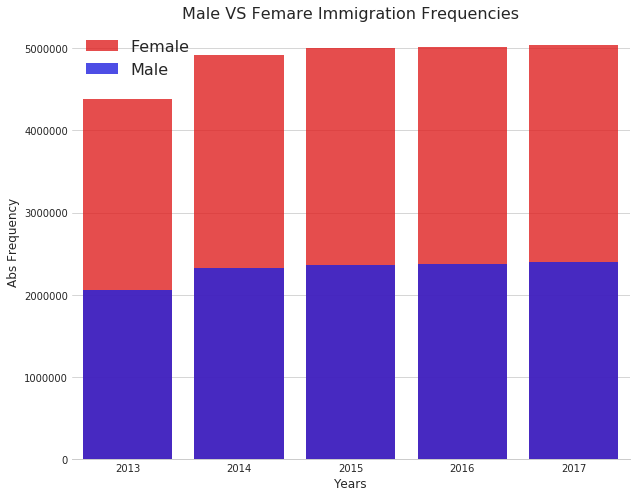

In [28]:
#Set general plot properties
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (10, 8)})

fig, ax = plt.subplots()
sns.barplot(y= totale, x = years, label = "Female",  color="r", alpha = .8)
sns.barplot(y= maschi, x = years, label = "Male",  color="b", alpha = .8)
sns.despine(left=True)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Abs Frequency", fontsize=12)
plt.legend(prop={'size':16})
plt.title("Male VS Female Immigration Frequencies", fontsize = 16)
#plt.xticks(rotation=45)

plt.show()

In [29]:
# Region distribution - aggragation over the year
regioni_aggr = {}

for r in list(set(regione_zona["Regione"])):
    regioni_aggr[r] = sum([sum(resident_foreigners_norm[resident_foreigners_norm["Provincia"] == i]["Numero"].values) for i in provincia_regione[provincia_regione["Regione"] == r]["Provincia"].values])

In [30]:
# Region distribution across the years
regioni = {}

for r in list(set(regione_zona["Regione"])):
    regioni[r] = {y: sum([sum(resident_foreigners_norm[(resident_foreigners_norm["Provincia"] == i) 
                                                          & (resident_foreigners_norm["Periodo"] == y)]["Numero"].values) 
                             for i in provincia_regione[provincia_regione["Regione"] == r]["Provincia"].values]) 
                  for y in years}

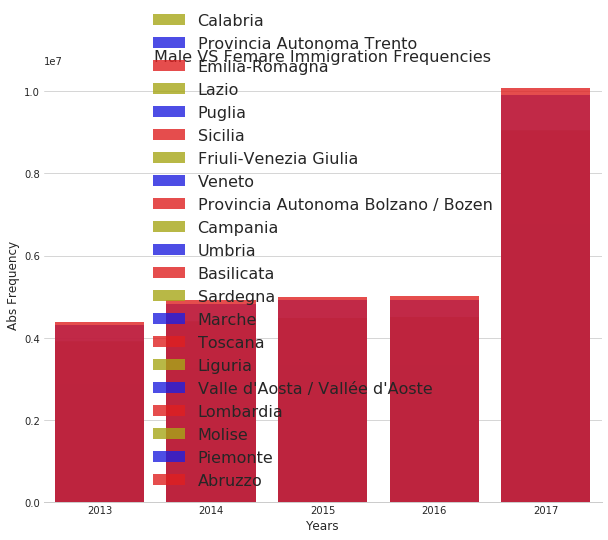

In [43]:
'''
#Set general plot properties
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (10, 8)})

fig, ax = plt.subplots()
colors = ["y", "b", "r","y", "b", "r", "y", "b", "r", "y", "b", "r", "y", "b", "r", "y", "b", "r", "y", "b", "r"]
year_distr = [0 for y in years]
for r, c in zip(regioni.keys(), colors):
    year_distr = [regioni[r][y]+last for y, last in zip(years, year_distr)]
    sns.barplot(y= year_distr, x = years, label = r,  color=c, alpha = .8)

sns.despine(left=True)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Abs Frequency", fontsize=12)
plt.legend(prop={'size':16})
plt.title("Male VS Femare Immigration Frequencies", fontsize = 16)
#plt.xticks(rotation=45)

plt.show()
'''

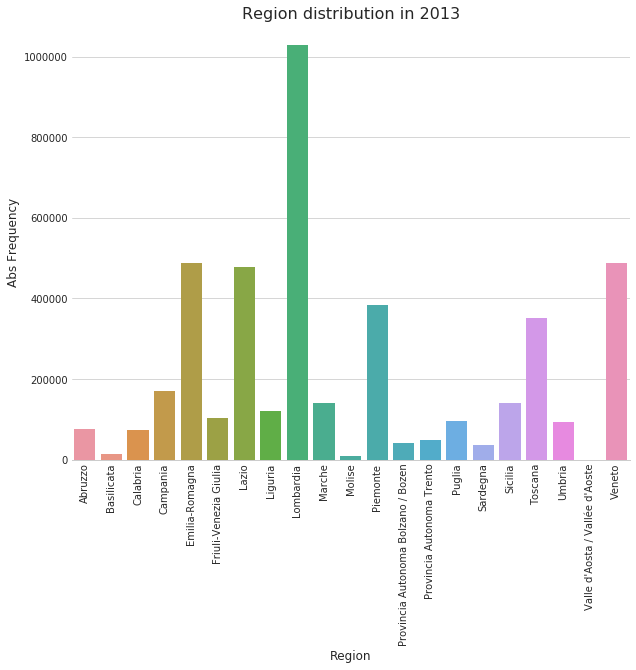

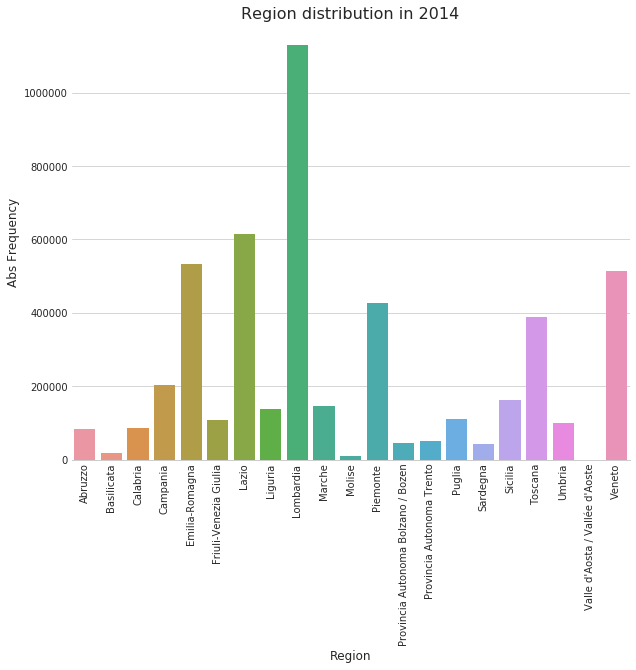

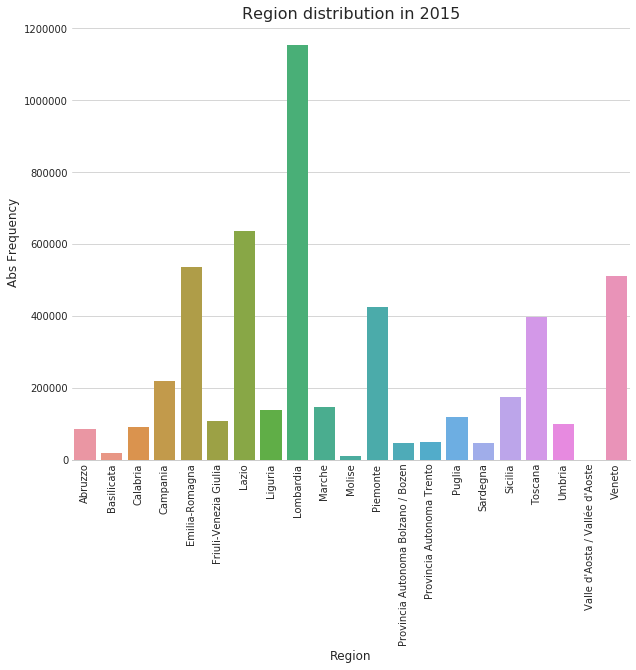

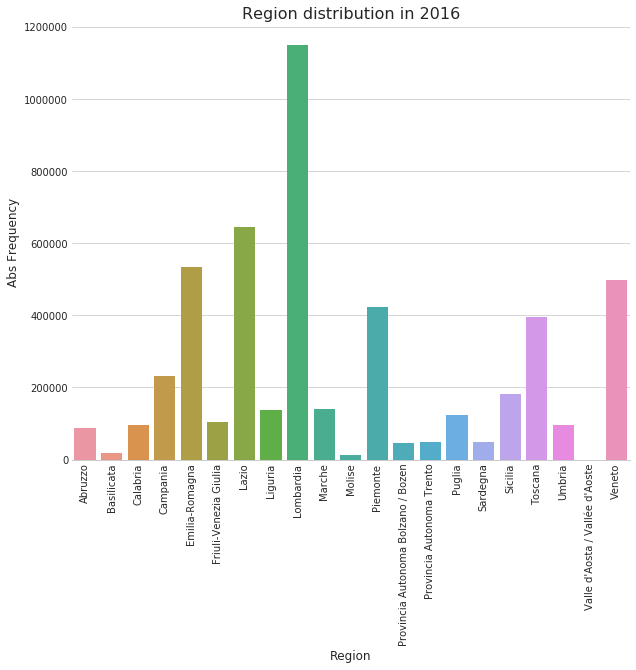

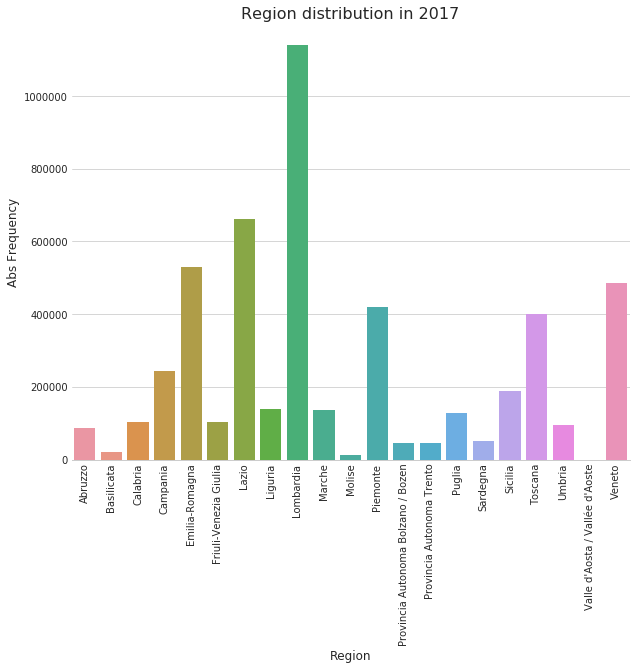

In [31]:
# Plot it!
temp = pd.DataFrame.from_dict(regioni)
for y in years:
    plt.figure()
    sns.barplot(y = temp.loc[y].values, x = temp.columns)

    plt.xticks(rotation=90)
    sns.despine(left=True)
    plt.xlabel("Region", fontsize=12)
    plt.ylabel("Abs Frequency", fontsize=12)
    plt.legend(prop={'size':16})
    plt.title("Region distribution in %d" %y, fontsize = 16)
plt.show()

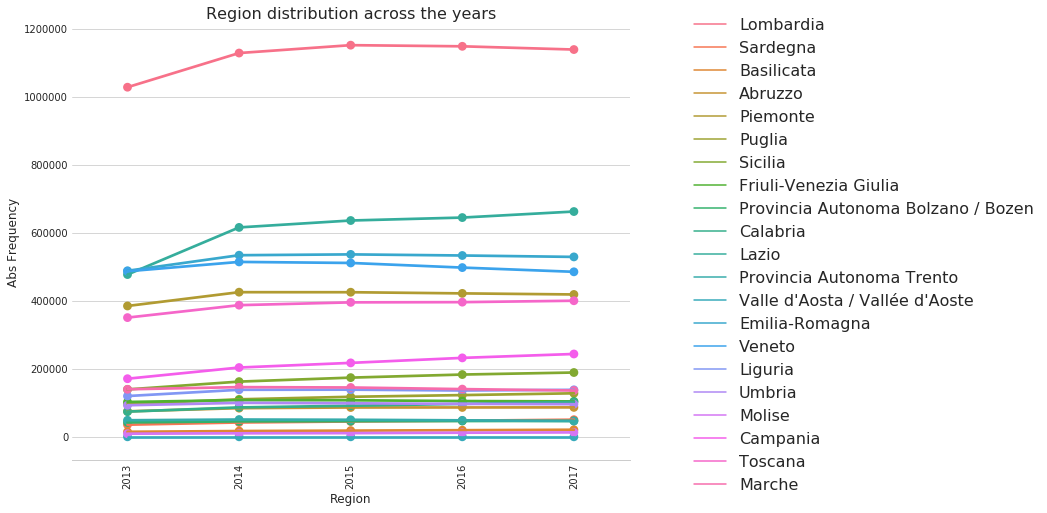

In [66]:
# Plot it!
legend = []
for r, c in zip(list(set(regione_zona["Regione"])), sns.color_palette("husl", 21)):
    temp = [regioni[r][y] for y in years]
    sns.pointplot(y = temp, x = years, label= r, color = c)
    legend.append(mlines.Line2D([], [], color=c, markersize=15, label=r))

plt.xticks(rotation=90)
sns.despine(left=True)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Abs Frequency", fontsize=12)
plt.legend(handles = legend, prop={'size':16}, loc='upper right', bbox_to_anchor=(1.75, 1.05), ncol=1)
plt.title("Region distribution across the years", fontsize = 16)
plt.show()

In [33]:
# Zone distribution across the years
zone = {}

for z in list(set(regione_zona["Zona"])):
    temp = regione_zona[regione_zona["Zona"] == z]["Regione"].values
    zone[z] = {y: sum([regioni[t][y] for t in temp]) for y in years}

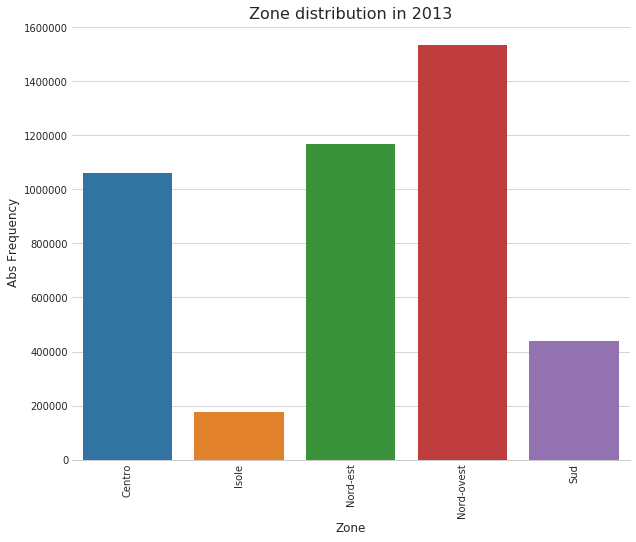

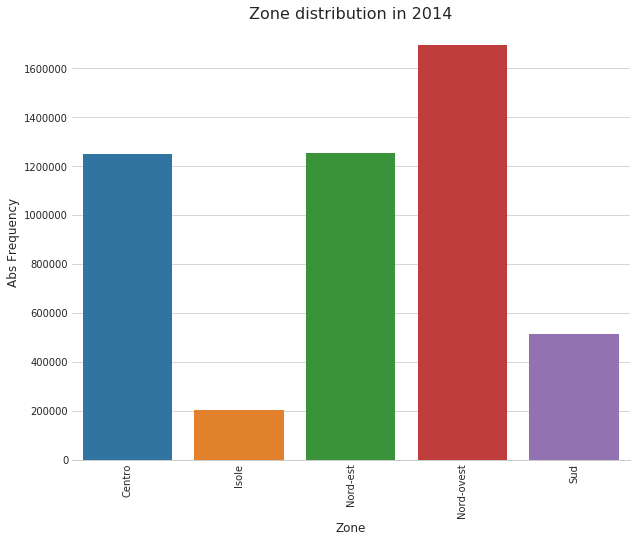

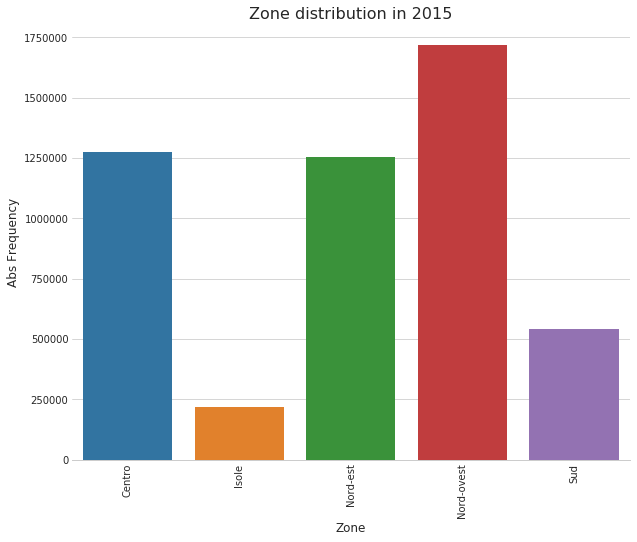

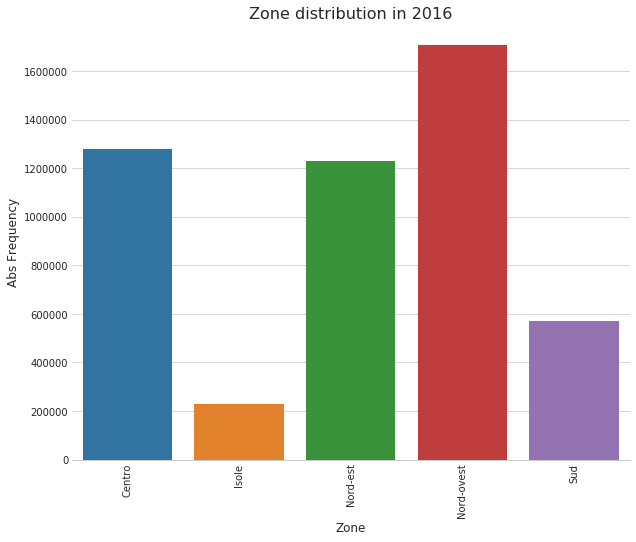

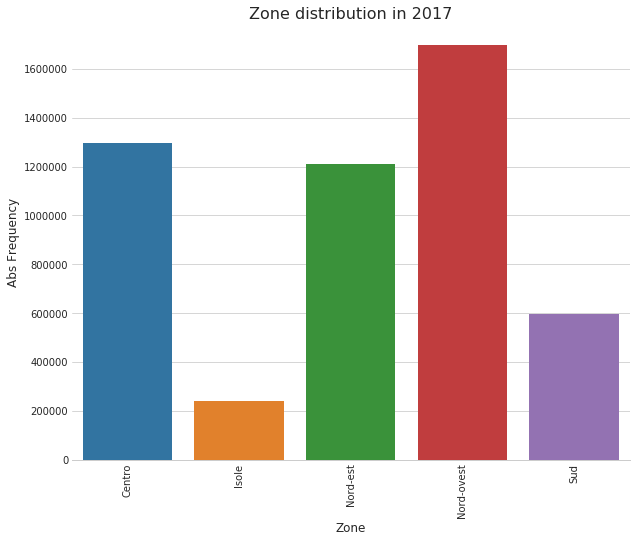

In [34]:
# Plot it!
temp = pd.DataFrame.from_dict(zone)
for y in years:
    plt.figure()
    sns.barplot(y = temp.loc[y].values, x = temp.columns)

    plt.xticks(rotation=90)
    sns.despine(left=True)
    plt.xlabel("Zone", fontsize=12)
    plt.ylabel("Abs Frequency", fontsize=12)
    plt.legend(prop={'size':16})
    plt.title("Zone distribution in %d" %y, fontsize = 16)
plt.show()

In [35]:
temp = pd.DataFrame.from_dict(zone, orient= "index")
temp

,2013,2014,2015,2016,2017
Centro,1060689,1249433,1275615,1278390,1295197
Isole,174990,204533,219153,230557,239463
Nord-est,1168991,1252900,1251764,1231379,1212188
Nord-ovest,1533448,1692933,1716286,1707025,1696462
Sud,439860,512142,541799,569621,594746


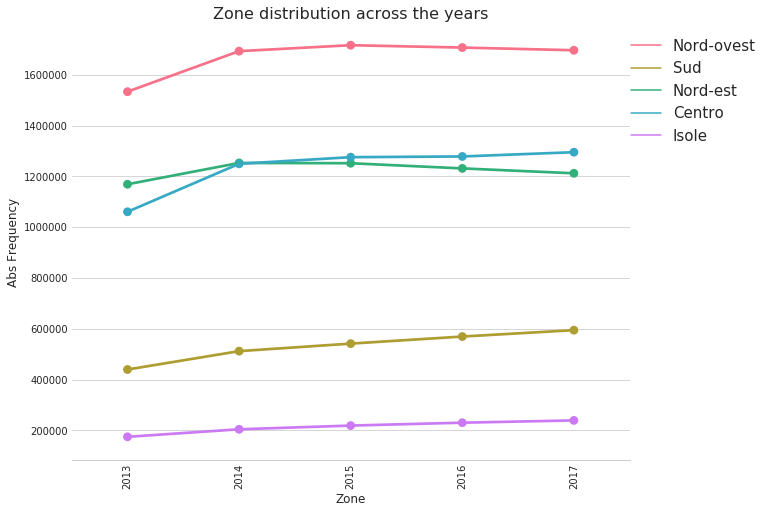

In [64]:
# Plot it!
legend = []
for z, c in zip(list(set(regione_zona["Zona"])), sns.color_palette("husl", 5)):
    temp = [zone[z][y] for y in years]
    sns.pointplot(y = temp, x = years,color = c)
    legend.append(mlines.Line2D([], [], color=c, markersize=15, label=z))
    

plt.xticks(rotation=90)
sns.despine(left=True)
plt.xlabel("Zone", fontsize=12)
plt.ylabel("Abs Frequency", fontsize=12)
plt.legend(handles=legend, prop={'size':15}, loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)
plt.title("Zone distribution across the years", fontsize = 16)
plt.show()

Missing data seems to be balanced between the different informatio:

In [106]:
# how many elements each year should have - *2(maschi-femmine)
len(list(set(resident_foreigners_norm["Cittadinanza"])))*len(list(set(resident_foreigners_norm["Territorio"])))*2

missing_across_years = [len(resident_foreigners_norm[(resident_foreigners_norm["Periodo"] == y)]) for y in years]

missing_across_territories = [len(resident_foreigners_norm[(resident_foreigners_norm["Territorio"] == t)]) 
                        for t in list(set(resident_foreigners_norm["Territorio"]))]


In [153]:
regione_zona

,Regione,Zona
0,Abruzzo,Sud
1,Basilicata,Sud
2,Calabria,Sud
3,Campania,Sud
4,Emilia-Romagna,Nord-est
5,Friuli-Venezia Giulia,Nord-est
6,Lazio,Centro
7,Liguria,Nord-ovest
8,Lombardia,Nord-ovest
9,Marche,Centro
